In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [36]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
n=diabetes_dataset['Outcome'].value_counts()
n

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [39]:
Q1=diabetes_dataset.Glucose.quantile(0.25)
Q3=diabetes_dataset.Glucose.quantile(0.75)
Q1,Q3

(99.0, 140.25)

In [40]:
IQR=Q3-Q1
IQR

41.25

In [41]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
Lower_limit
Upper_limit

202.125

In [42]:
diabetes_dataset[(diabetes_dataset.Glucose<Lower_limit)|(diabetes_dataset.Glucose>Upper_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [43]:
diabetes_dataset=diabetes_dataset[(diabetes_dataset.Glucose>Lower_limit)&(diabetes_dataset.Glucose<Upper_limit)]
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
Q1=diabetes_dataset.Insulin.quantile(0.25)
Q3=diabetes_dataset.Insulin.quantile(0.75)
Q1,Q3

(0.0, 128.5)

In [45]:
IQR=Q3-Q1
IQR

128.5

In [46]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
Lower_limit,Upper_limit

(-192.75, 321.25)

In [47]:
diabetes_dataset[(diabetes_dataset.Insulin<Lower_limit)|(diabetes_dataset.Insulin>Upper_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [48]:
diabetes_dataset=diabetes_dataset[(diabetes_dataset.Insulin>Lower_limit)&(diabetes_dataset.Insulin<Upper_limit)]
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 Non diabetic(0):  482
 Diabetic(0):  248


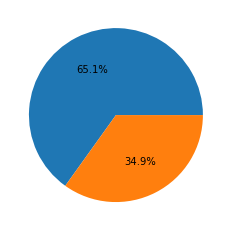

In [49]:
plt.pie(n,autopct="%1.1f%%")
N,P=diabetes_dataset['Outcome'].value_counts()
print(' Non diabetic(0): ',N)
print(' Diabetic(0): ',P)

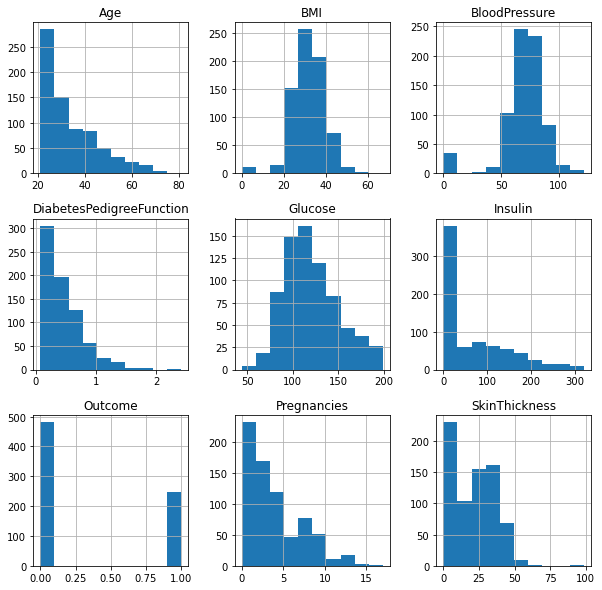

In [50]:
#histogram to show distribution of data
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

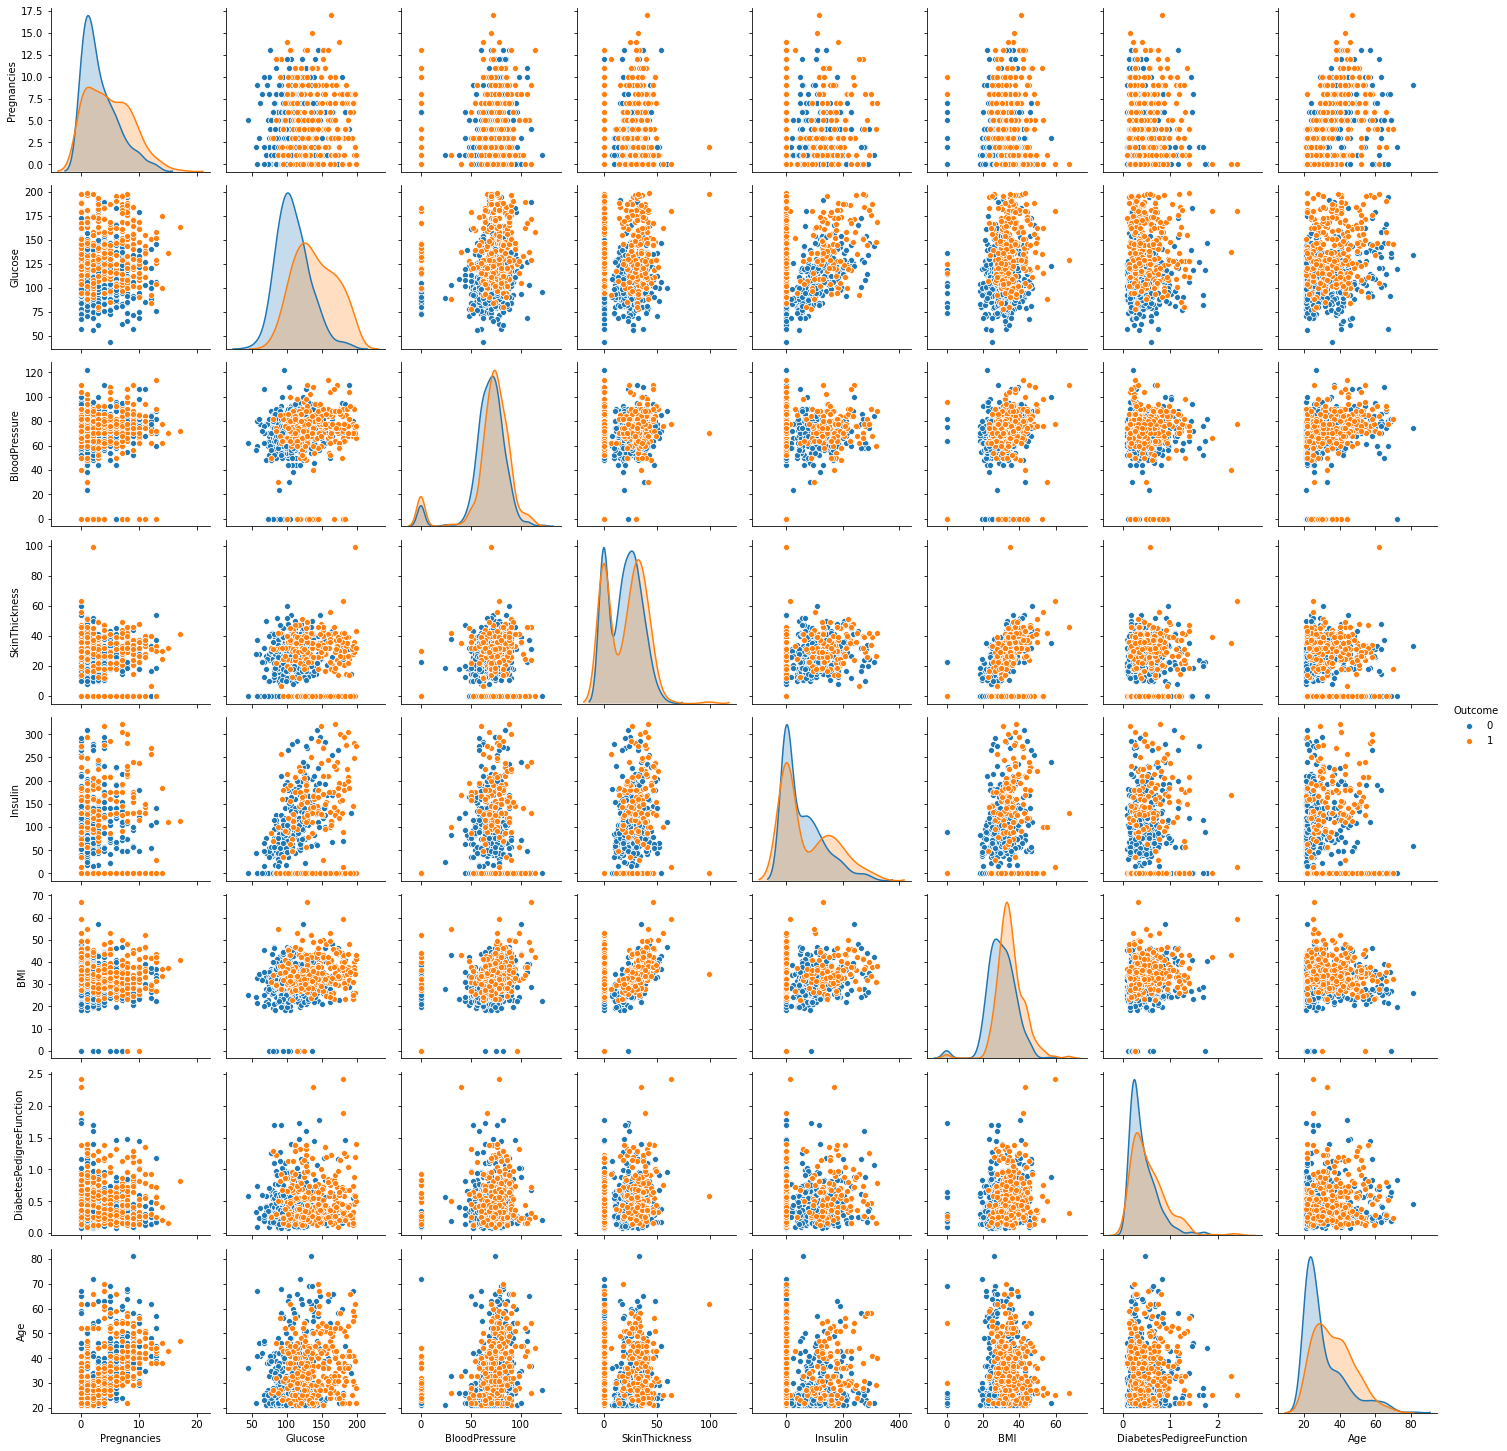

In [51]:
sns.pairplot(diabetes_dataset,hue='Outcome')

In [52]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
#axis =1 for dropping a column and axis=0 for dropping a row
Y = diabetes_dataset['Outcome']


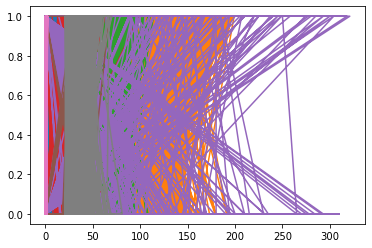

In [53]:
plt.plot(X,Y)

In [54]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [55]:
standardized_data = scaler.transform(X)

In [56]:
X = standardized_data
Y = diabetes_dataset['Outcome']

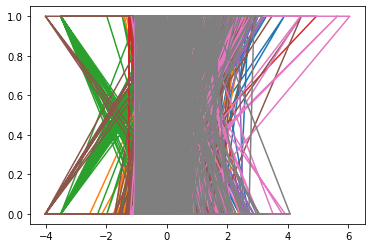

In [57]:
plt.plot(X,Y)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

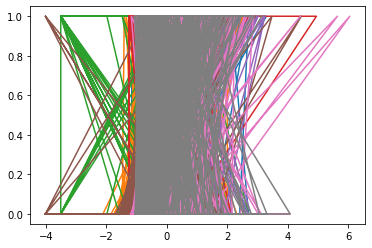

In [59]:
plt.plot(X_train,Y_train)

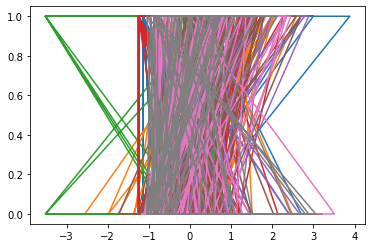

In [60]:
plt.plot(X_test,Y_test)

### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_predict=knn.predict(X_test)
print('Training accuracy of KNN ',knn.score(X_train,Y_train)*100)
print('Testing accuracy of KNN ',knn.score(X_test,Y_test)*100)
print('Model accuracy of KNN ',accuracy_score(Y_test,knn_predict)*100)

Training accuracy of KNN  82.87671232876713
Testing accuracy of KNN  76.02739726027397
Model accuracy of KNN  76.02739726027397


### svm

In [68]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,Y_train)
sv_predict=sv.predict(X_test)
print('Training accuracy of SVM ',sv.score(X_train,Y_train)*100)
print('Testing accuracy of SVM ',sv.score(X_test,Y_test)*100)
print('Model accuracy of SVM ',accuracy_score(Y_test,sv_predict)*100)

Training accuracy of SVM  82.87671232876713
Testing accuracy of SVM  80.82191780821918
Model accuracy of SVM  80.82191780821918


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)
rf_predict=rf.predict(X_test)
print('Training accuracy of RF ',rf.score(X_train,Y_train)*100)
print('Testing accuracy of RF ',rf.score(X_test,Y_test)*100)
print('Model accuracy of Rf ',accuracy_score(Y_test,rf_predict)*100)

Training accuracy of RF  100.0
Testing accuracy of RF  80.13698630136986
Model accuracy of Rf  80.13698630136986


### Logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,Y_train)
lr_predict=lr.predict(X_test)
print('Training accuracy of Logistic Regression ',lr.score(X_train,Y_train)*100)
print('Testing accuracy of Logistic Regression ',lr.score(X_test,Y_test)*100)
print('Model accuracy of Logistic Regression ',accuracy_score(Y_test,lr_predict)*100)

Training accuracy of Logistic Regression  78.08219178082192
Testing accuracy of Logistic Regression  78.76712328767124
Model accuracy of Logistic Regression  78.76712328767124


### Naive_byes

In [71]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
nb_predict=nb.predict(X_test)
print('Training accuracy of Naive byes ',nb.score(X_train,Y_train)*100)
print('Testing accuracy of Naive byes ',nb.score(X_test,Y_test)*100)
print('Model accuracy of Naive byes ',accuracy_score(Y_test,nb_predict)*100)

Training accuracy of Naive byes  75.51369863013699
Testing accuracy of Naive byes  78.08219178082192
Model accuracy of Naive byes  78.08219178082192


### Decision tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_predict=dt.predict(X_test)
print('Training accuracy of Decision Tree ',dt.score(X_train,Y_train)*100)
print('Testing accuracy of Decision Tree ',dt.score(X_test,Y_test)*100)
print('Model accuracy of Decision Tree ',accuracy_score(Y_test,dt_predict)*100)

Training accuracy of Decision Tree  100.0
Testing accuracy of Decision Tree  73.97260273972603
Model accuracy of Decision Tree  73.97260273972603
